In [1]:
# Multiple Linear Regression

In [2]:
import pandas as pd

In [5]:
advertising = pd.read_csv("Datas/advertising.csv")

In [6]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# Visualising Data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

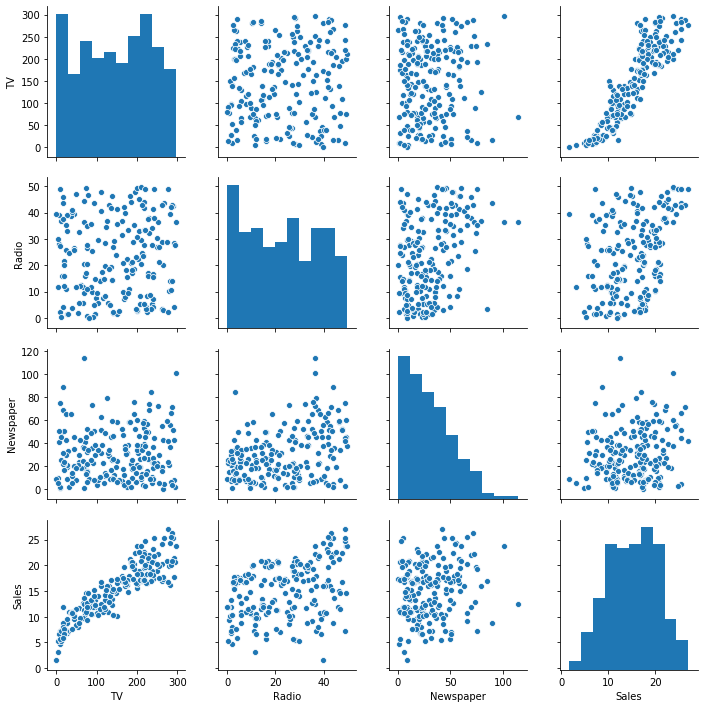

In [13]:
sns.pairplot(advertising)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


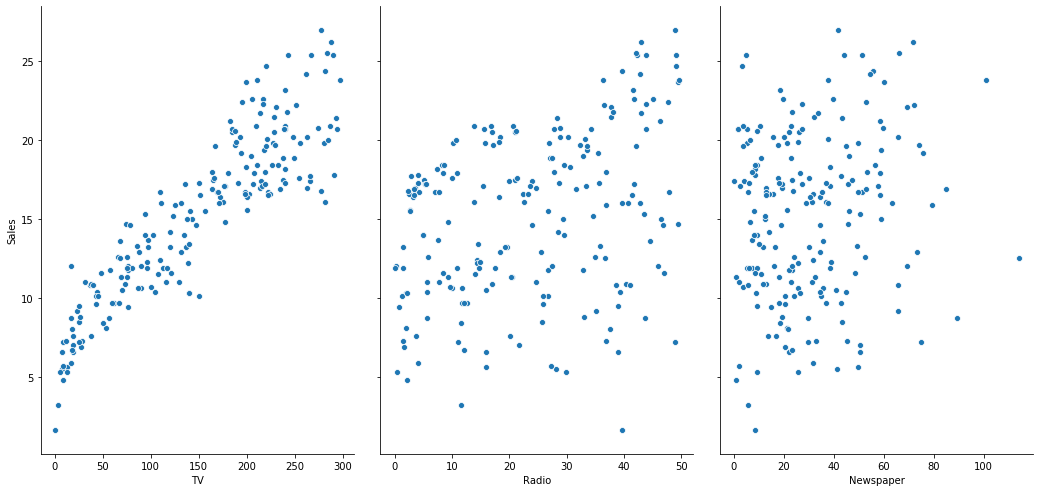

In [14]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'scatter')

In [15]:
# Splitting the Data for Training and Testing

In [18]:
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [22]:
# Performing Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Model Evaluation

In [27]:
print(lm.intercept_)

4.334595861728431


In [30]:
coeff_df = pd.DataFrame(lm.coef_, X_test.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.053829
Radio,0.110012
Newspaper,0.006290


In [31]:
# Predictions

In [32]:
y_pred = lm.predict(X_test)

In [36]:
# Calculating Error Terms

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [38]:
print("Mean_squared_value", mse)
print("R_square_value", r_squared)

Mean_squared_value 2.6360765623280655
R_square_value 0.8655979373420272


In [39]:
# Checking for P-Value using STATSMODELS

In [40]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        4.334596
TV           0.053829
Radio        0.110012
Newspaper    0.006290
dtype: float64

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           4.73e-71
Time:                        13:57:44   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
plt.figure(figsize = (5, 5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

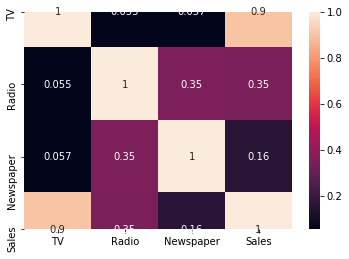

In [45]:
sns.heatmap(advertising.corr(), annot = True)

In [46]:
# Implementing the results and running the model again

In [48]:
X_train_new = X_train[['TV', 'Radio']]
X_test_new = X_test[['TV', 'Radio']]

Text(0, 0.5, 'Sales')

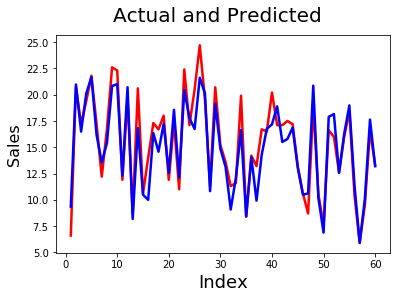

In [53]:
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "red", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred, color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Sales', fontsize = 16)

Text(0, 0.5, 'Sales')

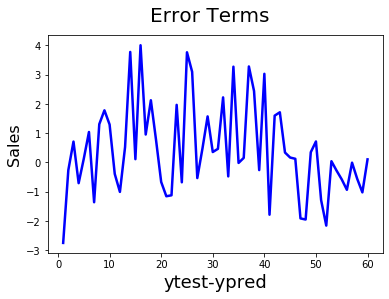

In [54]:
# Error Terms
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test - y_pred, color = "blue", linewidth = 2.5, linestyle = '-')
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('ytest-ypred', fontsize = 18)
plt.ylabel('Sales', fontsize = 16)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [57]:
print("Mean_squared_value :", mse)
print("R_squared_value :", r_squared)

Mean_squared_value : 2.6360765623280655
R_squared_value : 0.8655979373420272


In [58]:
X_train_final = X_train_new
X_train_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train, X_train_final).fit()
print(lm_final.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           2.38e-72
Time:                        15:31:45   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4251      0.342     12.923      0.0

In [59]:
from sklearn.feature_selection import RFE

In [60]:
rfe = RFE(lm, 2)

In [61]:
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

TypeError: Cannot clone object '<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D70F56B688>' (type <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.